In [1]:
# Class Neural Network

class NeuralNetwork:
    def __init__(self, inputs_nodes, hidden_nodes, outputs_nodes, learning_rating):
        self.input_nodes = inputs_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = outputs_nodes
        self.lr = learning_rating
        self.bias = 0
        
        self.nscale = 1 / self.input_nodes ** (-0.5)
        self.w12 = np.random.normal(scale = self.nscale, size = ((self.input_nodes + self.bias), self.hidden_nodes))
        self.w23 = np.random.normal(scale = self.nscale, size = ((self.hidden_nodes + self.bias), self.output_nodes))
        
        sigmoid = lambda x: 1 / (1 + np.exp(-x))
        deriv_sigmoid = lambda x: (1 / (1 + np.exp(-x)))*(1 - 1 / ((1 + np.exp(-x))))
        
        self.activation_function = sigmoid
        self.deriv_activation_function = deriv_sigmoid
        
        
        
        
    def feedforward_bias(self, x):
        print('x', x.shape)
        x = np.append(x, 1) # use of bias
        print('x', x.shape)
        print('w12', self.w12.shape)
        phi12 = self.activation_function(np.dot(x, self.w12))
        print('phi12', phi12.shape)
        
        phi12 = np.append(phi12, 1) # use of bias
        print('phi12', phi12.shape)
        dphi12 = self.deriv_activation_function(np.dot(x, self.w12))
        print('dphi12', dphi12.shape)
        dphi12 = np.append(dphi12, 1)
        
        output, doutput = self.activation_function(np.dot(phi12, self.w23)), 1
        return phi12, dphi12, output, doutput
    
    
    
    
    def feedforward(self, x):
        phi12 = self.activation_function(np.dot(x, self.w12))
        dphi12 = self.deriv_activation_function(np.dot(x, self.w12))
        output = self.activation_function(np.dot(phi12, self.w23))
        #doutput = self.deriv_activation_function(np.dot(phi12, self.w23)) # Classification
        doutput = 1 # Regression
        return phi12, dphi12, output, doutput
    
    def backforward(self, x, phi12, dphi12, output, doutput, error):
        output_error_term = error * doutput
        hidden_error = np.dot(self.w23, output_error_term)
        hidden_error_term = hidden_error * dphi12
        return output_error_term, hidden_error_term
    
    def update_weights(self, x, phi12, output_error_term, hidden_error_term, dw12, dw23):
        dw12 += hidden_error_term*x[:, None]
        dw23 += output_error_term*phi12[:, None]
        
        self.w12 += self.lr*dw12/features.shape[0]
        self.w23 += self.lr*dw23/features.shape[0]
        return None
    
    def shuffle_data(self, features, targets):
        df1 = pd.DataFrame(features)
        df2 = pd.DataFrame(targets)
        df = pd.concat([df1, df2], axis = 1)
        df = df.sample(frac = 1)
    
        features = df.iloc[:, :features.shape[1]].values
        targets = df.iloc[:, features.shape[1]:].values
        return features, targets  

    def train(self, features, targets, epochs):
        for e in range(epochs):
            features, targets = self.shuffle_data(features, targets)
            error_rms, dw12, dw23 = 0, np.zeros(self.w12.shape), np.zeros(self.w23.shape) 
            for x, y in zip(features, targets):
            
                phi12, dphi12, output, doutput = self.feedforward(x)
            
                error = y - output
            
                output_error_term, hidden_error_term = self.backforward(x, phi12, dphi12, output, doutput, error)
            
                self.update_weights(x, phi12, output_error_term, hidden_error_term, dw12, dw23)
                
                error_rms += np.mean(error**2)
                
            Total_error = error_rms/(2 * features.shape[0])
            
        print(Total_error)
        
    def run(self, features_run):
        aoutput = []
        for x in features_run:
            phi12, dphi12, output, doutput = self.feedforward(x)
            
            aoutput = np.append(aoutput, output)
        return aoutput
            

0.0110814181193


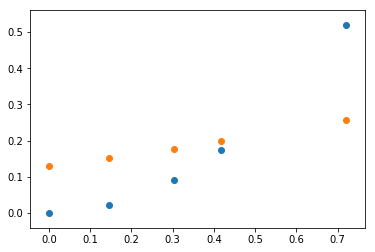

In [2]:
import numpy as np
import pandas as pd
import random as rd
import matplotlib.pyplot as plt

np.random.seed(1)

#features = np.random.rand(5, 3)
#targets = np.random.rand(5, 2)

features = np.random.rand(5, 1)
targets = features**2

hidden_nodes, learning_rate, epochs = 2, 0.01, 1000
nn = NeuralNetwork(features.shape[1], hidden_nodes, targets.shape[1], learning_rate)
nn.train(features, targets, epochs)


plt.scatter(features, targets)
plt.scatter(features, nn.run(features))
plt.show()